<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/hw6_q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
data = np.matrix('''-10.29   37.289;
   1.9409   0.0079;
   1.2120   1.2379 ; 
   -0.0078   0.2580 ;  
   2.0823   0.8685   ;
   1.3899   1.0880   ;
   0.3645   0.4404   ;
   1.4437   0.0501   ;
   1.7812   1.5690   ;
   0.1783   0.7344   ;
   -0.1878   -1.2023  ; 
   1.9863   0.4814   ;
   1.3274   1.2341   ;
   1.0215   -0.0039   ;
   0.0529   0.6256   ;
   -0.1859   -0.0559  ; 
   2.4725   1.0557   ;
   -0.2173   0.9588   ;
   -0.1283   -0.3493  ; 
   0.7389   1.9535   ;
   1.1286   1.6565   ;
   -0.1678   0.5394   ;
   0.7376   -0.2132   ;
   -0.3194   1.9312   ;
   1.0112   0.3549   ;
   1.8057   1.2316   ;
   0.0102   2.3396   ;
   1.2895   2.4789   ;
   2.1380   0.3159   ;
   -0.2919   0.9271   ;
   0.6694   0.1564   ;
   8.4665   23.3274   ;
   -7.1971   -11.7014  ; 
   -11.8130   -17.0197  ; 
   -0.1900   24.0273''').T
data.shape


(2, 35)

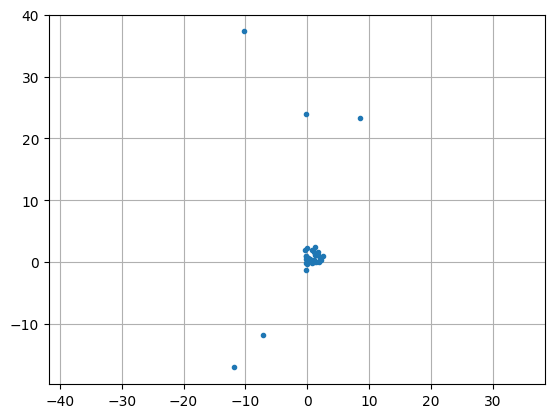

In [299]:
plt.plot(data[0,:].T,data[1,:].T,'.')
plt.axis('equal')
plt.grid(True)
plt.show()

In [300]:
def run_opt(X):
    m = X.shape[1]
    A = cvx.Variable((2,2),symmetric=True)
    b = cvx.Variable((2,1))
    volume = (-cvx.log_det(A))
    const = []
    for i in range(m):
        xi = X[:,i:i+1]
        const += [cvx.norm( cvx.vec(A@xi + b),2)<= 1]
    const += [A>>0]
    obj = cvx.Minimize(volume)
    problem = cvx.Problem(obj,const)
    problem.solve(solver='SCS',eps=1e-11)
    
    duals = np.zeros((m,1))
    for j in range(m):
        duals[j] = const[j].dual_value
    idx = np.argmax(duals)
    return idx,problem.value

checking how many outlier we have using plot

In [301]:
O = np.array([[],[]])
X = data.copy()
vol_list = []
for k in range(15):
    idx,volume_val =run_opt(X)
    vol_list.append(volume_val)
    O = np.append(O,X[:,idx:idx+1],axis=1)
    X = np.delete(X,idx,axis=1)
print(vol_list)

[5.992113051211168, 5.820259856549233, 5.297870396069092, 4.585667577221027, 4.548058836788339, 3.204538871597598, 0.9619599620126977, 0.8685894923751452, 0.7377946232259424, 0.67206374818854, 0.5597091135075791, 0.49382367399259786, 0.33201317100604566, 0.3247644495732893, 0.3223865390344819]


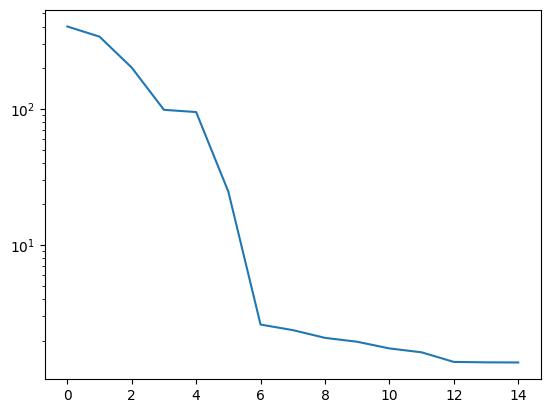

In [302]:
plt.plot(np.exp(vol_list))
plt.yscale("log")

removing outliers and plotting data

[5.992113051211168, 5.820259856549233, 5.297870396069092, 4.585667577221027, 4.548058836788339, 3.204538871597598]


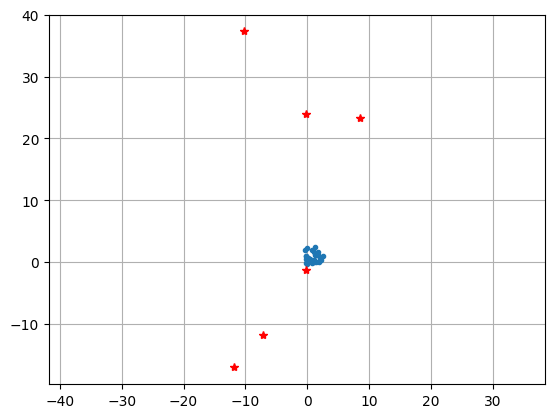

In [303]:
N_outlier = 6
O = np.array([[],[]])
X = data.copy()
vol_list = []
for k in range(N_outlier):
    idx,volume_val =run_opt(X)
    vol_list.append(volume_val)
    O = np.append(O,X[:,idx:idx+1],axis=1)
    X = np.delete(X,idx,axis=1)
plt.plot(X[0,:].T,X[1,:].T,'.')
plt.plot(O[0,:].T,O[1,:].T,'*r')
plt.axis('equal')
plt.grid(True)
plt.show()